<a href="https://colab.research.google.com/github/tashlinr/Kaggle/blob/master/kaggle_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Keras CNN for Kaggle Digit-Recognizer

### Self contained notebook using Google Collab, GPU hardware accelerator for training, and kaggle api for downloading dataset, and submitting results.

#### No advanced hyperparameter tuning 

In [0]:
# upload kaggle.json api file
from google.colab import files
files.upload()

In [0]:
#install kaggle api
!pip install -q kaggle

In [0]:
#make new directory
!mkdir -p ~/.kaggle

In [0]:
#place .json file in directory
!cp kaggle.json ~/.kaggle/

In [5]:
# download digit-recognizer dataset from kaggle
!kaggle competitions download -c digit-recognizer

 83% 61.0M/73.2M [00:00<00:00, 68.0MB/s]
100% 73.2M/73.2M [00:00<00:00, 107MB/s] 
 66% 32.0M/48.8M [00:00<00:00, 87.5MB/s]
100% 48.8M/48.8M [00:00<00:00, 123MB/s] 
  0% 0.00/235k [00:00<?, ?B/s]
100% 235k/235k [00:00<00:00, 45.1MB/s]


In [0]:
# import pandas and numpy for quick data exploration and handling
import numpy as np
import pandas as pd

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')


In [7]:
test.shape

(28000, 784)

In [0]:
#divide training labels and data 
y_train_df = train['label']
X_train_df = train.drop(['label'], axis = 1)

X_test = np.array(test)

In [9]:
y_train_df.head()

0    1
1    0
2    1
3    4
4    0
Name: label, dtype: int64

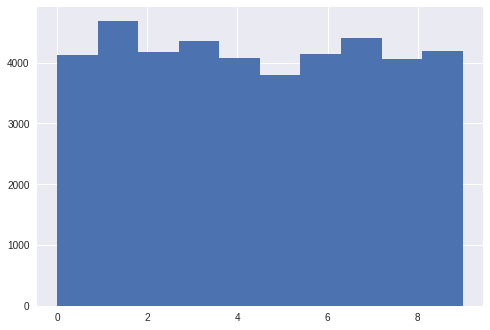

In [10]:
# quick check of the training labels distribution
y_train_df.hist()

In [0]:
#convert pandas dataframe to numpy array for keras
y = np.array(y_train_df)
X = np.array(X_train_df)
#data is downloaded as a 784, 1Dim array, since we want to use a CNN we need to reshape training data
img_rows = 28
img_cols = 28

In [0]:
#reshape for CNN
x = X.reshape(X.shape[0], img_rows, img_cols, 1)
x_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)

In [13]:
#double check reshape worked as intended
print(x_test.shape)

(28000, 28, 28, 1)


In [0]:
# use sklearn to split training data and create validation set, 33% of our data will be kept seperate
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(x, y, test_size=0.33, random_state=42)

In [16]:
#triple check to make sure our shape of inputs are correct.
print(X_train.shape)
print(X_val.shape)
print(y_train.shape)
print(y_val.shape)
print(x_test.shape)

(28140, 28, 28, 1)
(13860, 28, 28, 1)
(28140,)
(13860,)
(28000, 28, 28, 1)


In [17]:
#normalize data
x_train = X_train.astype('float32')
x_test = x_test.astype('float32')
x_val = X_val.astype('float32')


x_train /= 255
x_test /= 255
x_val /= 255

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
print(x_val.shape[0], 'val samples')

x_train shape: (28140, 28, 28, 1)
28140 train samples
28000 test samples
13860 val samples


In [19]:
#import keras 
from __future__ import print_function
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

# for training and validation, categorical data is better used
y_train = keras.utils.to_categorical(y_train, 10)
y_val = keras.utils.to_categorical(y_val, 10)

Using TensorFlow backend.


In [0]:
#define some basic parameters
input_shape = (img_rows, img_cols, 1)
num_classes = 10

In [0]:
#define model topology
model = Sequential()

model.add(Conv2D(32, kernel_size = (3,3),
                 activation = 'relu',
                 input_shape = input_shape))

model.add(Conv2D(64, kernel_size =(3,3),
                 activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, kernel_size =(3,3),
                 activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.4))

model.add(Flatten())

model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation = 'softmax'))

In [0]:
#compile with cat-crossentropy, adam optimizer, and accuracy as the metric.
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])


In [27]:
#model training and fit
model.fit(x_train, y_train,
          batch_size=64,
          epochs=20,
          verbose=1,
          validation_data=(x_val, y_val))


Train on 28140 samples, validate on 13860 samples
Epoch 1/20
28140/28140 [==============================] - 11s 407us/step - loss: 0.3458 - acc: 0.8925 - val_loss: 0.0761 - val_acc: 0.9766
Epoch 2/20
28140/28140 [==============================] - 10s 352us/step - loss: 0.1152 - acc: 0.9652 - val_loss: 0.0562 - val_acc: 0.9828
Epoch 3/20
28140/28140 [==============================] - 10s 349us/step - loss: 0.0844 - acc: 0.9751 - val_loss: 0.0504 - val_acc: 0.9838
Epoch 4/20
28140/28140 [==============================] - 10s 346us/step - loss: 0.0722 - acc: 0.9784 - val_loss: 0.0362 - val_acc: 0.9887
Epoch 5/20
28140/28140 [==============================] - 10s 341us/step - loss: 0.0612 - acc: 0.9807 - val_loss: 0.0388 - val_acc: 0.9885
Epoch 6/20
28140/28140 [==============================] - 10s 341us/step - loss: 0.0538 - acc: 0.9834 - val_loss: 0.0424 - val_acc: 0.9875
Epoch 7/20
28140/28140 [==============================] - 9s 330us/step - loss: 0.0464 - acc: 0.9853 - val_loss: 0.0

In [28]:
#evaluate model
score = model.evaluate(x_val, y_val, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.02781499139288805
Test accuracy: 0.9926406926406927


In [0]:
#make prediction for kaggle
prediction = model.predict(x_test)

In [30]:
#double check shape to make sure everything was predicted
prediction.shape

(28000, 10)

In [0]:
#use argmax to convert back from categorical
pred = np.argmax(prediction, axis =1)

In [0]:
# format prediction for kaggle submission
results = pd.Series(pred,name="Label")


In [0]:
submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),results],axis = 1)

submission.to_csv("cnn_mnist_ex.csv",index=False)


In [34]:
#Use kaggle api to submit directly from notebook
!kaggle competitions submit digit-recognizer -f cnn_mnist_ex.csv -m "smaller batchsize"

100% 208k/208k [00:00<00:00, 583kB/s]
Successfully submitted to Digit Recognizer

### Public Score of 0.99057, not too bad. :)